MERGING DATASETS

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the datasets
df_2013 = pd.read_csv("C:\\Users\\bomma\\Downloads\\Medicare-Physician-and-Other-Supplier-NPI-Aggregate-CY2013.csv")
df_2014 = pd.read_csv("C:\\Users\\bomma\\Downloads\\Medicare-Physician-and-Other-Supplier-NPI-Aggregate-CY2014.csv")

# Defining year
df_2013['year'] = 2013
df_2014['year'] = 2014

# Combining the datasets
df = pd.concat([df_2013, df_2014])

(df.head())

,rndrng_npi,rndrng_prvdr_last_org_name,rndrng_prvdr_first_name,rndrng_prvdr_mi,rndrng_prvdr_crdntls,rndrng_prvdr_gndr,rndrng_prvdr_ent_cd,rndrng_prvdr_st1,rndrng_prvdr_st2,rndrng_prvdr_city,...,bene_cc_dbts_pct,bene_cc_hyplpdma_pct,bene_cc_hyprtnsn_pct,bene_cc_ihd_pct,bene_cc_opo_pct,bene_cc_raoa_pct,bene_cc_sz_pct,bene_cc_strok_pct,bene_avg_risk_scre,year
0,1003047713,Capaldi,Kiara,M,DC,F,I,160 Smithfield Ave,NaN,Pawtucket,...,NaN,0.71,NaN,NaN,NaN,NaN,0.00,0.0,1.0098,2013
1,1003093071,Girard,Brian,F,CRNA,M,I,593 Eddy Street,Davol 129,Providence,...,0.33,0.69,0.75,0.43,NaN,0.55,NaN,NaN,1.4819,2013
2,1003820176,Dunn,Albert,A,M.D.,M,I,120 W Center St,Suite#3,W Bridgewater,...,0.33,0.31,0.42,0.34,NaN,0.21,NaN,NaN,0.8325,2013
3,1003825860,Manning,Carol,NaN,APRN,F,I,22 Prospect St,NaN,Nashua,...,0.60,0.55,0.60,NaN,NaN,NaN,NaN,0.0,1.1791,2013
4,1003840331,O'farrell,Jean,R,RN/NP,F,I,365 East St,NaN,Tewksbury,...,0.32,0.36,0.56,0.20,0.19,0.24,0.46,NaN,2.1819,2013


DATA PRE-PROCESSING

In [ ]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

print("Columns with Missing Values:")
print(missing_values)

Columns with Missing Values:
rndrng_prvdr_first_name      50
rndrng_prvdr_mi             630
rndrng_prvdr_crdntls         96
rndrng_prvdr_gndr            50
rndrng_prvdr_st2           1089
rndrng_prvdr_state_fips       2
rndrng_prvdr_ruca             2
rndrng_prvdr_ruca_desc        2
drug_sprsn_ind             1833
drug_tot_hcpcs_cds          167
drug_tot_benes              167
drug_tot_srvcs              167
drug_sbmtd_chrg             167
drug_mdcr_alowd_amt         167
drug_mdcr_pymt_amt          167
drug_mdcr_stdzd_amt         167
med_sprsn_ind              1833
med_tot_hcpcs_cds           167
med_tot_benes               167
med_tot_srvcs               167
med_sbmtd_chrg              167
med_mdcr_alowd_amt          167
med_mdcr_pymt_amt           167
med_mdcr_stdzd_amt          167
bene_age_lt_65_cnt          627
bene_age_65_74_cnt          409
bene_age_75_84_cnt          679
bene_age_gt_84_cnt          809
bene_feml_cnt               243
bene_male_cnt               243
bene_race_w

In [ ]:
# Checking for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


STATISTICAL SUMMARY

Summary Statistics for Total Charges by State:
  rndrng_prvdr_state_abrvtn  mean_tot_sbmtd_chrg  std_tot_sbmtd_chrg  \
0                        NH        264212.884697       289824.746009   
1                        RI        268751.335157       273498.924818   

   mean_tot_mdcr_alowd_amt  std_tot_mdcr_alowd_amt  
0             81652.602800            75392.134687  
1             95441.950698            82903.678664  


,rndrng_prvdr_state_abrvtn,mean_tot_sbmtd_chrg,std_tot_sbmtd_chrg,mean_tot_mdcr_alowd_amt,std_tot_mdcr_alowd_amt
0,NH,264212.884697,289824.746009,81652.602800,75392.134687
1,RI,268751.335157,273498.924818,95441.950698,82903.678664


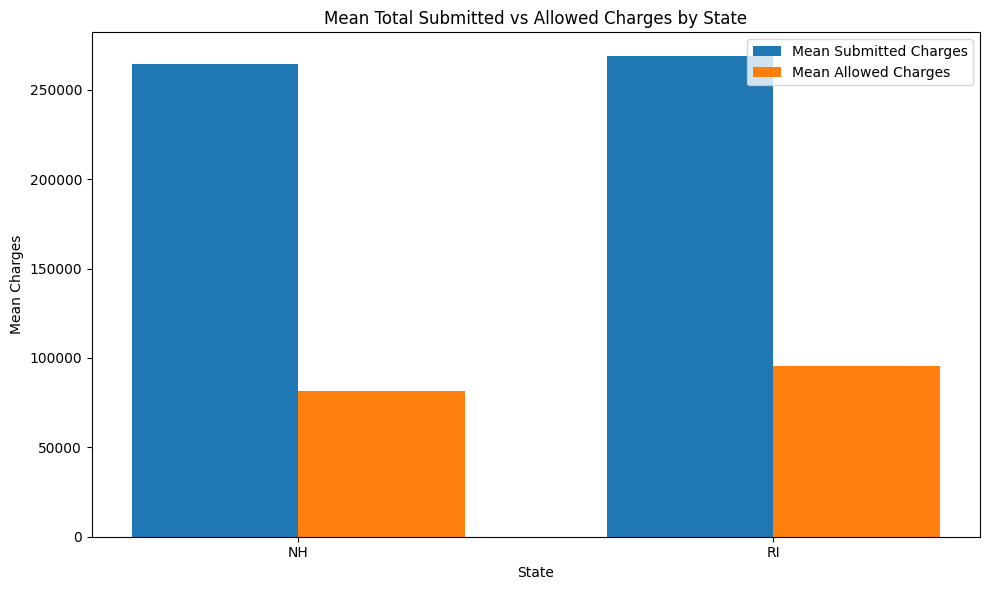

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# keeping only physicians with MD or DO degrees in RI and NH
df_filtered = df[(df['rndrng_prvdr_crdntls'].isin(['MD', 'DO'])) &
                 (df['rndrng_prvdr_state_abrvtn'].isin(['RI', 'NH']))]

# Summary statistics for total submitted charges and allowed charges by state
summary_stats = df_filtered.groupby('rndrng_prvdr_state_abrvtn').agg(
    mean_tot_sbmtd_chrg=pd.NamedAgg(column='tot_sbmtd_chrg', aggfunc='mean'),
    std_tot_sbmtd_chrg=pd.NamedAgg(column='tot_sbmtd_chrg', aggfunc='std'),
    mean_tot_mdcr_alowd_amt=pd.NamedAgg(column='tot_mdcr_alowd_amt', aggfunc='mean'),
    std_tot_mdcr_alowd_amt=pd.NamedAgg(column='tot_mdcr_alowd_amt', aggfunc='std')
).reset_index()

# Print the summary statistics table
print("Summary Statistics for Total Charges by State:")
print(summary_stats)

# Display the summary statistics table
from IPython.display import display
display(summary_stats)

# Visualization
plt.figure(figsize=(10, 6))
bar_width = 0.35
states = summary_stats['rndrng_prvdr_state_abrvtn']
index = range(len(states))

# Plot for Mean Submitted Charges
plt.bar(index, summary_stats['mean_tot_sbmtd_chrg'], bar_width, label='Mean Submitted Charges')

# Plot for Mean Allowed Charges
plt.bar([i + bar_width for i in index], summary_stats['mean_tot_mdcr_alowd_amt'], bar_width, label='Mean Allowed Charges')

# Customize the graph
plt.xticks([i + bar_width/2 for i in index], states)
plt.title("Mean Total Submitted vs Allowed Charges by State")
plt.xlabel("State")
plt.ylabel("Mean Charges")
plt.legend()
plt.tight_layout()

# Show the graph
plt.show()

TOP THREE SPECIALITIES

Proportions of Top 3 Specialties within Each State:


,rndrng_prvdr_state_abrvtn,rndrng_prvdr_type,count,total_doctors,proportion
0,NH,Anesthesiology,8,72,11.111111
1,NH,Family Practice,28,72,38.888889
2,NH,Internal Medicine,12,72,16.666667
3,RI,Anesthesiology,8,70,11.428571
4,RI,Family Practice,6,70,8.571429
5,RI,Internal Medicine,22,70,31.428571


rndrng_prvdr_state_abrvtn rndrng_prvdr_type  proportion
                       NH    Anesthesiology   11.111111
                       NH   Family Practice   38.888889
                       NH Internal Medicine   16.666667
                       RI    Anesthesiology   11.428571
                       RI   Family Practice    8.571429
                       RI Internal Medicine   31.428571


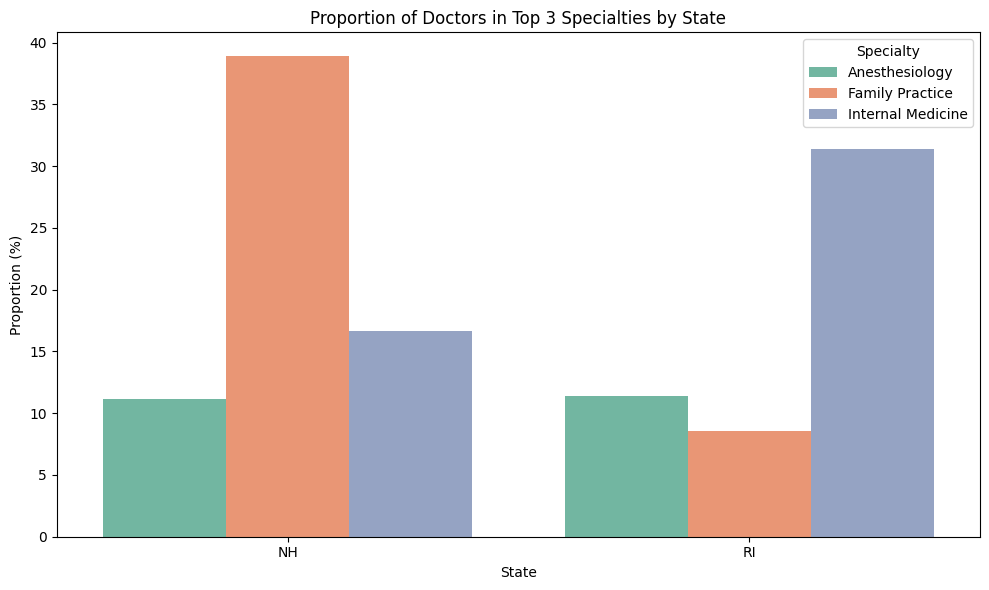

In [ ]:
# Identifying the three most common specialties overall
top_specialties = df_filtered['rndrng_prvdr_type'].value_counts().nlargest(3).index

# Filtering to include only the top 3 specialties
df_top_specialties = df_filtered[df_filtered['rndrng_prvdr_type'].isin(top_specialties)]

# Grouping by state and specialty to calculate the count of doctors
specialty_counts = df_top_specialties.groupby(['rndrng_prvdr_state_abrvtn', 'rndrng_prvdr_type']).size().reset_index(name='count')

# Calculating the total number of doctors in each state
total_doctors_by_state = df_filtered.groupby('rndrng_prvdr_state_abrvtn').size().reset_index(name='total_doctors')

# Merge the counts with total doctors to calculate proportions
specialty_proportions = pd.merge(specialty_counts, total_doctors_by_state, on='rndrng_prvdr_state_abrvtn')
specialty_proportions['proportion'] = (specialty_proportions['count'] / specialty_proportions['total_doctors']) * 100

# Print the results
print("Proportions of Top 3 Specialties within Each State:")
display(specialty_proportions)

# Table display
print(specialty_proportions[['rndrng_prvdr_state_abrvtn', 'rndrng_prvdr_type', 'proportion']].to_string(index=False))

# Visualization: Proportion of Top 3 Specialties by State
plt.figure(figsize=(10, 6))
sns.barplot(data=specialty_proportions,
            x='rndrng_prvdr_state_abrvtn',
            y='proportion',
            hue='rndrng_prvdr_type',
            palette='Set2')

# Customize the plot
plt.title("Proportion of Doctors in Top 3 Specialties by State")
plt.xlabel("State")
plt.ylabel("Proportion (%)")
plt.legend(title="Specialty")
plt.tight_layout()

# Show the plot
plt.show()

REGRESSION ANALYSIS

In [ ]:
# Encoding categorical variables
df_filtered = pd.get_dummies(df_filtered, columns=['rndrng_prvdr_state_abrvtn', 'rndrng_prvdr_type', 'year'], drop_first=True)

# Defining the dependent and independent variables
X = df_filtered.drop(columns=['tot_mdcr_alowd_amt', 'rndrng_npi', 'rndrng_prvdr_last_org_name', 'rndrng_prvdr_first_name', 'rndrng_prvdr_mi',
                              'rndrng_prvdr_crdntls', 'rndrng_prvdr_gndr', 'rndrng_prvdr_ent_cd', 'rndrng_prvdr_st1', 'rndrng_prvdr_st2',
                              'rndrng_prvdr_city', 'rndrng_prvdr_zip5', 'rndrng_prvdr_ruca', 'rndrng_prvdr_ruca_desc', 'rndrng_prvdr_cntry',
                              'rndrng_prvdr_mdcr_prtcptg_ind', 'tot_hcpcs_cds', 'tot_benes', 'tot_srvcs', 'tot_sbmtd_chrg', 'tot_mdcr_pymt_amt',
                              'tot_mdcr_stdzd_amt', 'drug_sprsn_ind', 'drug_tot_hcpcs_cds', 'drug_tot_benes', 'drug_tot_srvcs', 'drug_sbmtd_chrg',
                              'drug_mdcr_alowd_amt', 'drug_mdcr_pymt_amt', 'drug_mdcr_stdzd_amt', 'med_sprsn_ind', 'med_tot_hcpcs_cds', 'med_tot_benes',
                              'med_tot_srvcs', 'med_sbmtd_chrg', 'med_mdcr_alowd_amt', 'med_mdcr_pymt_amt', 'med_mdcr_stdzd_amt', 'bene_avg_age',
                              'bene_age_lt_65_cnt', 'bene_age_65_74_cnt', 'bene_age_75_84_cnt', 'bene_age_gt_84_cnt', 'bene_feml_cnt', 'bene_male_cnt',
                              'bene_race_wht_cnt', 'bene_race_black_cnt', 'bene_race_api_cnt', 'bene_race_hspnc_cnt', 'bene_race_natind_cnt', 'bene_race_othr_cnt',
                              'bene_dual_cnt', 'bene_ndual_cnt', 'bene_cc_af_pct', 'bene_cc_alzhmr_pct', 'bene_cc_asthma_pct', 'bene_cc_cncr_pct',
                              'bene_cc_chf_pct', 'bene_cc_ckd_pct', 'bene_cc_copd_pct', 'bene_cc_dprssn_pct', 'bene_cc_dbts_pct', 'bene_cc_hyplpdma_pct',
                              'bene_cc_hyprtnsn_pct', 'bene_cc_ihd_pct', 'bene_cc_opo_pct', 'bene_cc_raoa_pct', 'bene_cc_sz_pct', 'bene_cc_strok_pct',
                              'bene_avg_risk_scre'])

y = df_filtered['tot_mdcr_alowd_amt']

# Adding a constant to the model
X = sm.add_constant(X)

# Converting boolean columns to integers
for col in X.select_dtypes(include='bool').columns:
    X[col] = X[col].astype(int)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     tot_mdcr_alowd_amt   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     7.292
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           4.20e-09
Time:                        03:29:12   Log-Likelihood:                -1771.3
No. Observations:                 142   AIC:                             3565.
Df Residuals:                     131   BIC:                             3597.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

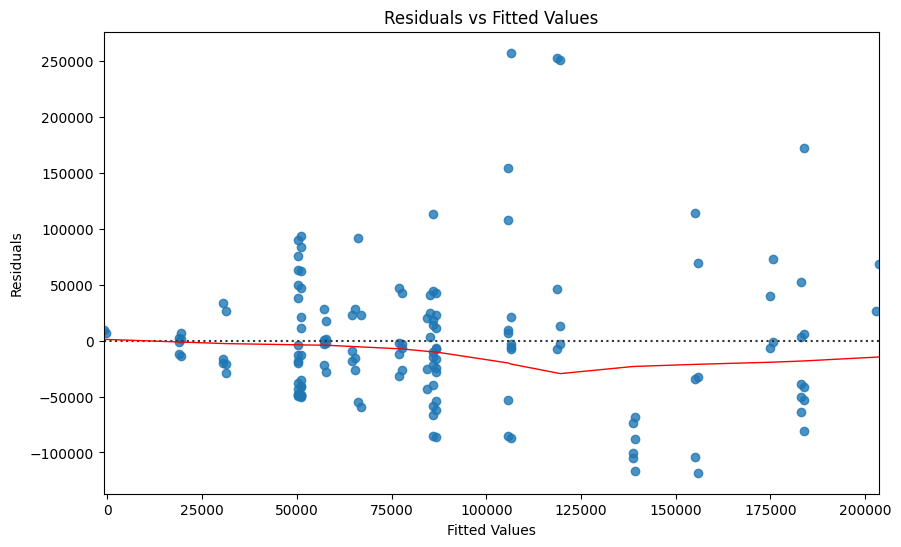

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot residuals
fitted_values = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(10, 6))
sns.residplot(x=fitted_values, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

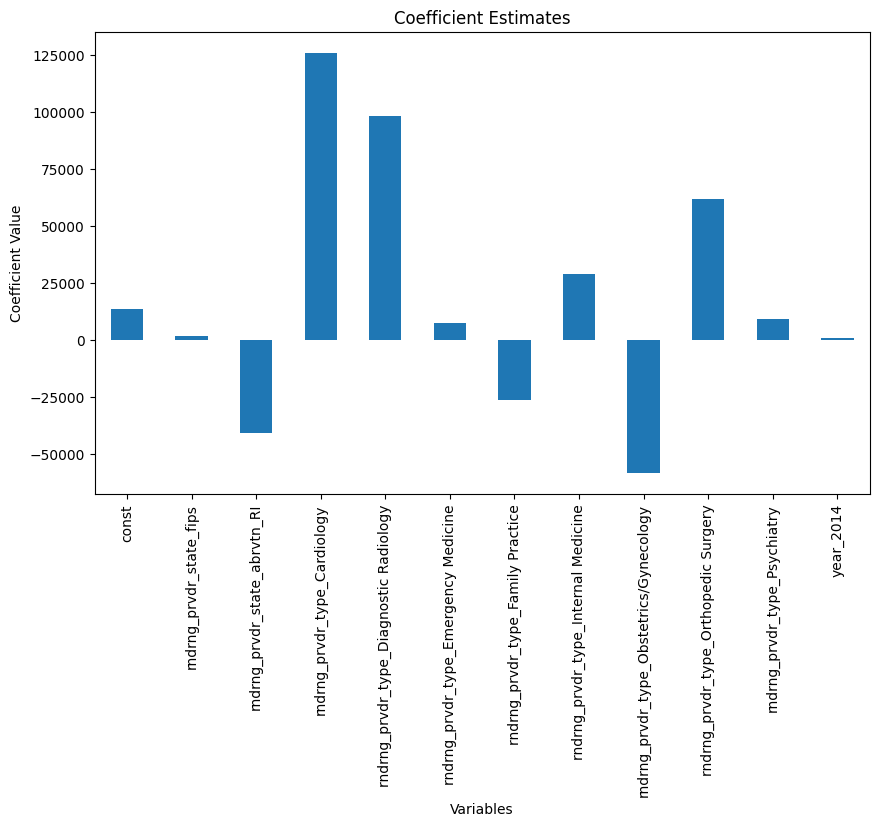

In [ ]:
# Coefficient plot
coefficients = model.params
plt.figure(figsize=(10, 6))
coefficients.plot(kind='bar')
plt.title('Coefficient Estimates')
plt.xlabel('Variables')
plt.ylabel('Coefficient Value')
plt.show()

SPECIALITY WITH HIGHEST CHARGES

In [ ]:
# Identifying the specialty with the highest allowed charges
specialty_coefficients = model.params.filter(like='rndrng_prvdr_type_')
highest_allowed_charges_specialty = specialty_coefficients.idxmax()
highest_allowed_charges_specialty = highest_allowed_charges_specialty.split('rndrng_prvdr_type_')[1]

# Print the result with the coefficient value for validation
print(f"The specialty with the highest allowed charges is: {highest_allowed_charges_specialty}")
print(f"Coefficient (allowed charges): {specialty_coefficients.max():.2f}")

The specialty with the highest allowed charges is: Cardiology
Coefficient (allowed charges): 125897.47


CORRELATION

The correlation between total submitted charges in 2013 and total allowed charges in 2014 is: 0.793


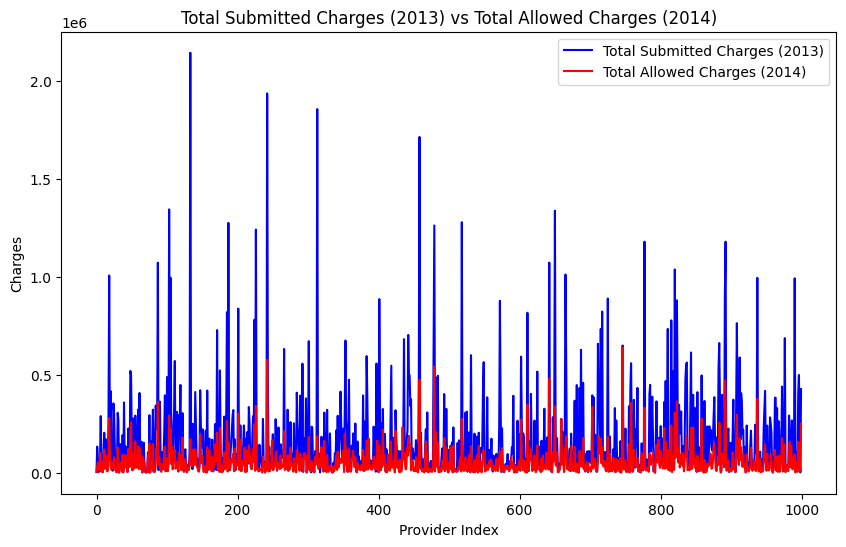

In [ ]:
# Merge 2013 and 2014 data on provider NPI to calculate correlation
df_merged = pd.merge(df_2013[['rndrng_npi', 'tot_sbmtd_chrg']],
                     df_2014[['rndrng_npi', 'tot_mdcr_alowd_amt']],
                     on='rndrng_npi', suffixes=('_2013', '_2014'))

# Calculate the correlation
correlation = df_merged['tot_sbmtd_chrg'].corr(df_merged['tot_mdcr_alowd_amt'])
print(f"The correlation between total submitted charges in 2013 and total allowed charges in 2014 is: {correlation:.3f}")

# Line graph for visualization
plt.figure(figsize=(10, 6))
plt.plot(df_merged.index, df_merged['tot_sbmtd_chrg'], label='Total Submitted Charges (2013)', color='blue')
plt.plot(df_merged.index, df_merged['tot_mdcr_alowd_amt'], label='Total Allowed Charges (2014)', color='red')
plt.xlabel('Provider Index')
plt.ylabel('Charges')
plt.title('Total Submitted Charges (2013) vs Total Allowed Charges (2014)')
plt.legend()
plt.show()
